<a href="https://colab.research.google.com/github/Srishti20022/Data-Science/blob/main/WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Web scrapping from Beautiful soup
!pip install bs4
!pip install html5lib

In [ ]:
from urllib.request import urlopen

In [ ]:
olympic_url = "https://en.wikipedia.org/wiki/Olympic_medal"

In [ ]:
olympic_data = urlopen(olympic_url)
# Here we are getting connection with the server
type(olympic_data)

http.client.HTTPResponse

In [99]:
olympic_html = olympic_data.read()
olympic_data.close()
# Closing the connection
# olympic_html

In [ ]:
# Parsing data
from bs4 import BeautifulSoup as soup

In [ ]:
olympic_soup = soup(olympic_html, 'html.parser')
# print(olympic_soup)

In [ ]:
print(type(olympic_soup))

<class 'bs4.BeautifulSoup'>


In [ ]:
olympic_soup.h1

<h1 class="firstHeading" id="firstHeading">Olympic medal</h1>

In [ ]:
olympic_soup.findAll('h1', {})

[<h1 class="firstHeading" id="firstHeading">Olympic medal</h1>]

In [ ]:
tables = olympic_soup.findAll('table', {'class' : "wikitable"})
print(len(tables))

2


In [ ]:
olympic_table = tables[0]
# print(olympic_table)

In [ ]:
# xtracting useful data from html of olympic_table

# Getting table header
table_header = olympic_table.findAll('th')
print(len(table_header))

9


In [ ]:
table_header[0]

<th scope="col">Games
</th>

In [ ]:
table_header[0].text

'Games\n'

In [ ]:
print(table_header[0].text)

Games



In [ ]:
column_titles = [ct.text[:-1] for ct in table_header]
# -1 to remove backslash
column_titles = column_titles[:-1]
print(column_titles)

['Games', 'Host', 'Details', 'Designer(s)', 'Mint', 'Diameter(mm)', 'Thickness(mm)', 'Weight(g)']


In [ ]:
row_data = olympic_table.findAll('tr')[1:]
print(len(row_data))
# print(row_data)

29


In [ ]:
first_row = row_data[0].findAll('td', {})
for d in first_row:
    print(d.text[:-1])

1896
Athens, Greece
Obverse: Zeus holding NikeReverse: The Acropolis
Jules-Clément Chaplain
Paris Mint
48
3.8
047



In [ ]:
table_row = []
for row in row_data:
    row_d = row.findAll('td', {})
    current_row = []
    for d in row_d:
        current_row.append(d.text[:-1])
    table_row.append(current_row)
for i in table_row:
    print(i)

['1896', 'Athens, Greece', 'Obverse: Zeus holding NikeReverse: The Acropolis', 'Jules-Clément Chaplain', 'Paris Mint', '48', '3.8', '047', '']
['1900', 'Paris, France', 'Obverse: Winged goddess (possible Nike) holding laurel branches; Paris in the backgroundReverse: A victorious athlete holding a laurel branch; the Acropolis in the background Note: The only Summer Olympic medal that is not circular', 'Frédérique Vernon', 'Paris Mint', '59 x 41', '3.2', '053', '']
['1904', 'St. Louis, Missouri, U.S.', 'Obverse: Nike holding a laurel crown and a palm leafReverse: An athlete holding a laurel crown; Greek temple in the background', 'Dieges & Clust', 'Dieges & Clust', '37.8', '3.5', '021', '']
['1908', 'London, Great Britain', 'Obverse: An athlete receiving a laurel crown from two female figuresReverse: Saint George atop a horseEdge: "Vaughton", event name and winner', 'Bertram Mackennal', 'Vaughton & Sons', '33', '4.4', '021', '']
['1912', 'Stockholm, Sweden', 'Obverse: An athlete receivin

In [ ]:
table_row = []
for row in row_data:
    row_d = row.findAll('td', {})
    current_row = []
    for idx,d in enumerate(row_d):
        strng = d.text[:-1]
        # if(idx == 1): 
        strng = strng.replace(', ', '-')
        current_row.append(strng)
    table_row.append(current_row[:-1])
for i in table_row:
    print(i)

['1896', 'Athens-Greece', 'Obverse: Zeus holding NikeReverse: The Acropolis', 'Jules-Clément Chaplain', 'Paris Mint', '48', '3.8', '047']
['1900', 'Paris-France', 'Obverse: Winged goddess (possible Nike) holding laurel branches; Paris in the backgroundReverse: A victorious athlete holding a laurel branch; the Acropolis in the background Note: The only Summer Olympic medal that is not circular', 'Frédérique Vernon', 'Paris Mint', '59 x 41', '3.2', '053']
['1904', 'St. Louis-Missouri-U.S.', 'Obverse: Nike holding a laurel crown and a palm leafReverse: An athlete holding a laurel crown; Greek temple in the background', 'Dieges & Clust', 'Dieges & Clust', '37.8', '3.5', '021']
['1908', 'London-Great Britain', 'Obverse: An athlete receiving a laurel crown from two female figuresReverse: Saint George atop a horseEdge: "Vaughton"-event name and winner', 'Bertram Mackennal', 'Vaughton & Sons', '33', '4.4', '021']
['1912', 'Stockholm-Sweden', 'Obverse: An athlete receiving a laurel crown from t

In [ ]:
# Writing and reading data in csv

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/olympics_data.csv'
with open(filename, 'w') as f:
    # Write the header
    header_string = ','.join(column_titles)
    header_string += '\n'
    f.write(header_string)
    print(header_string)
    for row in table_row:
        row_string = ','.join(row)
        row_string += '\n'
        f.write(row_string)
        print(row_string)

Games,Host,Details,Designer(s),Mint,Diameter(mm),Thickness(mm),Weight(g)

1896,Athens-Greece,Obverse: Zeus holding NikeReverse: The Acropolis,Jules-Clément Chaplain,Paris Mint,48,3.8,047

1900,Paris-France,Obverse: Winged goddess (possible Nike) holding laurel branches; Paris in the backgroundReverse: A victorious athlete holding a laurel branch; the Acropolis in the background Note: The only Summer Olympic medal that is not circular,Frédérique Vernon,Paris Mint,59 x 41,3.2,053

1904,St. Louis-Missouri-U.S.,Obverse: Nike holding a laurel crown and a palm leafReverse: An athlete holding a laurel crown; Greek temple in the background,Dieges & Clust,Dieges & Clust,37.8,3.5,021

1908,London-Great Britain,Obverse: An athlete receiving a laurel crown from two female figuresReverse: Saint George atop a horseEdge: "Vaughton"-event name and winner,Bertram Mackennal,Vaughton & Sons,33,4.4,021

1912,Stockholm-Sweden,Obverse: An athlete receiving a laurel crown from two female figuresReverse: A he

In [ ]:
# Cleaning of data

In [ ]:
import pandas as  pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olympics_data.csv')
# df = pd.DataFrame(table_row)
print(df)

    Games                         Host  \
0   1896   Athens-Greece                 
1   1900   Paris-France                  
2   1904   St. Louis-Missouri-U.S.       
3   1908   London-Great Britain          
4   1912   Stockholm-Sweden              
5   1920   Antwerp-Belgium               
6   1924   Paris-France                  
7   1928   Amsterdam-Netherlands         
8   1932   Los Angeles-California-U.S.   
9   1936   Berlin-Germany                
10  1948   London-Great Britain          
11  1952   Helsinki-Finland              
12  1956   Melbourne-Australia           
13  1960   Rome-Italy                    
14  1964   Tokyo-Japan                   
15  1968   Mexico City-Mexico            
16  1972   Munich-West Germany           
17  1976   Montreal-Quebec-Canada        
18  1980   Moscow-Russia                 
19  1984   Los Angeles-California-U.S.   
20  1988   Seoul-South Korea             
21  1992   Barcelona-Spain               
22  1996   Atlanta-U.S.           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
df.head(n = 10)

Games                         Host  \
0  1896   Athens-Greece                 
1  1900   Paris-France                  
2  1904   St. Louis-Missouri-U.S.       
3  1908   London-Great Britain          
4  1912   Stockholm-Sweden              
5  1920   Antwerp-Belgium               
6  1924   Paris-France                  
7  1928   Amsterdam-Netherlands         
8  1932   Los Angeles-California-U.S.   
9  1936   Berlin-Germany                

                                                                                                                                                                                                                                   Details  \
0  Obverse: Zeus holding NikeReverse: The Acropolis                                                                                                                                                                                          
1  Obverse: Winged goddess (possible Nike) holding laurel branches; Paris in the backgroundReverse: A victorious athlete holding a laurel branch; the Acropolis in the background Note: The only Summer Olympic medal that is not circular   
2  Obverse: Nike holding a laurel crown and a palm leafReverse: An athlete holding a laurel crown; Greek temple in the background                                                                                                            
3  Obverse: An athlete receiving a laurel crown from two female figuresReverse: Saint George atop a horseEdge: "Vaughton"-event name and winner                                                                                              
4  Obverse: An athlete receiving a laurel crown from two female figuresReverse: A herald opening the Games with a statue of Pehr Henrik Ling behind him                                                                                      
5  Obverse: An athlete holding a laurel crown and a palm leafReverse: Statue of Silvius BraboEdge: Name-event-team-"Antwerp"-and the date                                                                                                    
6  Obverse: An athlete helping another to standReverse: A harp and various items of sports equipment                                                                                                                                         
7  Design: TrionfoNote: This obverse design-sometimes recreated-remains until 2004-the reverse design remained until 1972                                                                                                                    
8  Design: Trionfo                                                                                                                                                                                                                           
9  Design: Trionfo                                                                                                                                                                                                                           

                                          Designer(s)                Mint  \
0  Jules-Clément Chaplain                              Paris Mint           
1  Frédérique Vernon                                   Paris Mint           
2  Dieges & Clust                                      Dieges & Clust       
3  Bertram Mackennal                                   Vaughton & Sons      
4  Bertram Mackennal (obverse)Erik Lindberg (reverse)  C.C. Sporrong & Co   
5  Josué Dupon                                         Coosmans             
6  André Rivaud                                        Paris Mint           
7  Giuseppe Cassioli                                   Dutch State Mint     
8  Giuseppe Cassioli                                   Whitehead & Hoag     
9  Giuseppe Cassioli                                   B.H. Mayer           

  Diameter(mm) Thickness(mm) Weight(g)  
0  48           3.8           047       
1 

In [ ]:
df = df.set_index('Games')
df.head(n = 10)

Host  \
Games                                
1896   Athens-Greece                 
1900   Paris-France                  
1904   St. Louis-Missouri-U.S.       
1908   London-Great Britain          
1912   Stockholm-Sweden              
1920   Antwerp-Belgium               
1924   Paris-France                  
1928   Amsterdam-Netherlands         
1932   Los Angeles-California-U.S.   
1936   Berlin-Germany                

                                                                                                                                                                                                                                       Details  \
Games                                                                                                                                                                                                                                            
1896   Obverse: Zeus holding NikeReverse: The Acropolis                                                                                                                                                                                          
1900   Obverse: Winged goddess (possible Nike) holding laurel branches; Paris in the backgroundReverse: A victorious athlete holding a laurel branch; the Acropolis in the background Note: The only Summer Olympic medal that is not circular   
1904   Obverse: Nike holding a laurel crown and a palm leafReverse: An athlete holding a laurel crown; Greek temple in the background                                                                                                            
1908   Obverse: An athlete receiving a laurel crown from two female figuresReverse: Saint George atop a horseEdge: "Vaughton"-event name and winner                                                                                              
1912   Obverse: An athlete receiving a laurel crown from two female figuresReverse: A herald opening the Games with a statue of Pehr Henrik Ling behind him                                                                                      
1920   Obverse: An athlete holding a laurel crown and a palm leafReverse: Statue of Silvius BraboEdge: Name-event-team-"Antwerp"-and the date                                                                                                    
1924   Obverse: An athlete helping another to standReverse: A harp and various items of sports equipment                                                                                                                                         
1928   Design: TrionfoNote: This obverse design-sometimes recreated-remains until 2004-the reverse design remained until 1972                                                                                                                    
1932   Design: Trionfo                                                                                                                                                                                                                           
1936   Design: Trionfo                                                                                                                                                                                                                           

                                              Designer(s)                Mint  \
Games                                                                           
1896   Jules-Clément Chaplain                              Paris Mint           
1900   Frédérique Vernon                                   Paris Mint           
1904   Dieges & Clust                                      Dieges & Clust       
1908   Bertram Mackennal                                   Vaughton & Sons      
1912   Bertram Mackennal (obverse)Erik Lindberg (reverse)  C.C. Sporrong & Co   
1920   Josué Dupon                                         Coosmans             
1924   André Rivaud 

In [ ]:
df.iloc[0][:]

Host             Athens-Greece                                   
Details          Obverse: Zeus holding NikeReverse: The Acropolis
Designer(s)      Jules-Clément Chaplain                          
Mint             Paris Mint                                      
Diameter(mm)     48                                              
Thickness(mm)    3.8                                             
Weight(g)        047                                             
Name: 1896, dtype: object

In [ ]:
# Loading local files
with open('/content/drive/MyDrive/Colab Notebooks/MyResume.html', encoding = 'utf-8') as f:
    page_soup = soup(f, 'html.parser')

In [ ]:
page_soup.findAll('h2')

[<h2 class="sr-only">Chat</h2>]

In [ ]:
# Web Scrapping of Image

In [41]:
import requests
url = "https://www.passiton.com/inspirational-quotes?utf8=%E2%9C%93&q=achievement"
response = requests.get(url)
# response.content

In [42]:
# parsing html to get information
import bs4
soup = bs4.BeautifulSoup(response.content)
# soup python object format

In [43]:
# FindAll takes tag and return the respective tags
# soup.findAll?

In [80]:
a_tag = soup.findAll('a')
# image_tag = a_tag.findAll('img')
i = 0
image = list()
for a in a_tag:
    if(a.find('img')):
        # print(a.findAll('src'))
        # print(a.findAll('img')[0].attrs['src']) # dixtionary of attributes
        if i!=0 and i!=14 and i!=15:
            image.append(a.findAll('img')[0].attrs['src'])
        i += 1
        # image_tag.append(a.findAll('img'))
    
    # print(i)
    # print(a)
# contains link of images
image

['https://assets.passiton.com/quotes/quote_artwork/3661/medium/20161212_monday_quote_new.jpg?1481507948',
 'https://assets.passiton.com/quotes/quote_artwork/3992/medium/20170831_thursday_quote.jpg?1501857948',
 'https://assets.passiton.com/quotes/quote_artwork/4241/medium/20160422_friday_quote.jpg?1460743082',
 'https://assets.passiton.com/quotes/quote_artwork/7252/medium/friday.jpg?1426889135',
 'https://assets.passiton.com/quotes/quote_artwork/7409/medium/20210714_wednesday_quote.jpg?1625591319',
 'https://assets.passiton.com/quotes/quote_artwork/7616/medium/20170405_wednesday_quote.jpg?1490991527',
 'https://assets.passiton.com/quotes/quote_artwork/7617/medium/20191104_monday_quote.jpg?1572625113',
 'https://assets.passiton.com/quotes/quote_artwork/7618/medium/20170407_friday_quote.jpg?1490991784',
 'https://assets.passiton.com/quotes/quote_artwork/7917/medium/20201116_monday_quote.jpg?1605289330',
 'https://assets.passiton.com/quotes/quote_artwork/7962/medium/20190807_wednesday_quo

In [86]:
import cv2
import matplotlib.pyplot as plt

In [91]:
def show_image(dta):
    with open('inspiration.jpj', 'wb') as file:
        url = requests.get(dta)
        file.write(url.content)
        img = cv2.imread('/content/inspiration.jpj')
        rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.style.use('seaborn')
# plt.imshow(img)
        plt.imshow(rgb_image)
        plt.axis("off")
        plt.show()

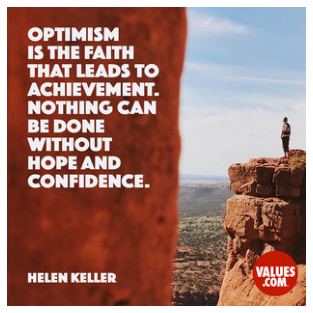

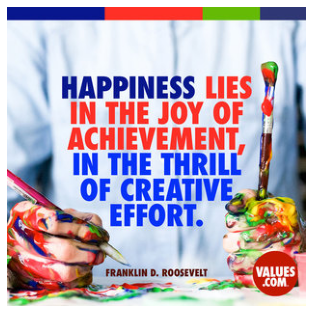

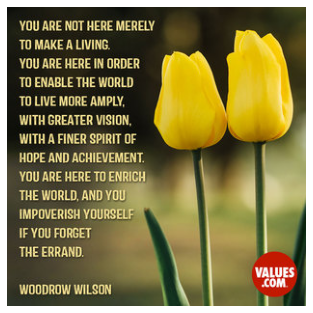

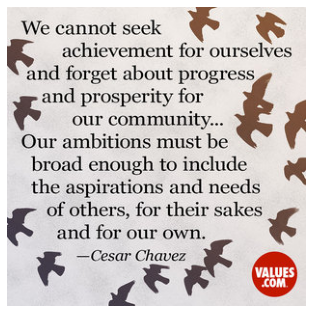

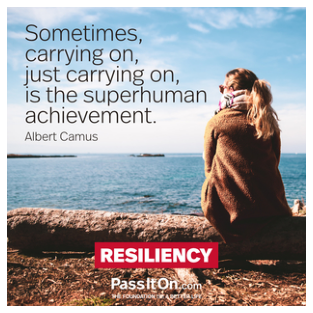

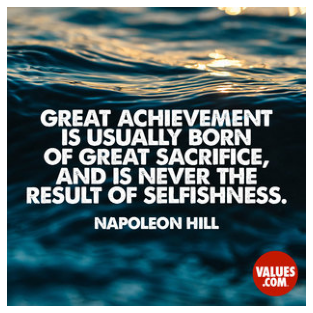

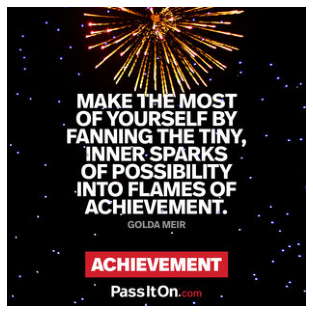

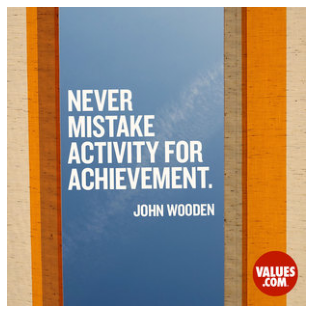

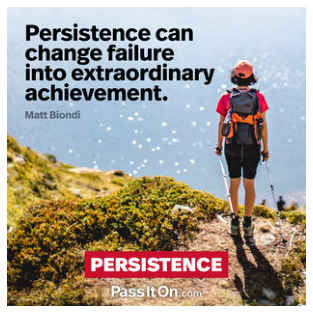

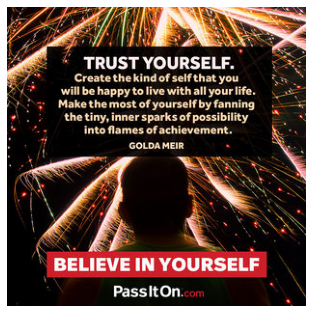

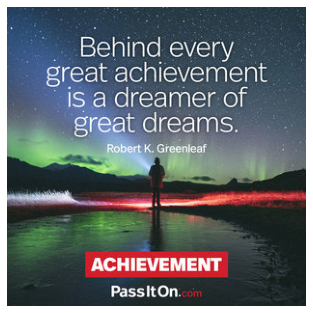

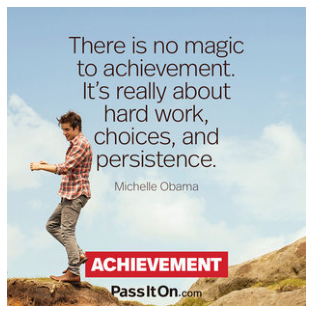

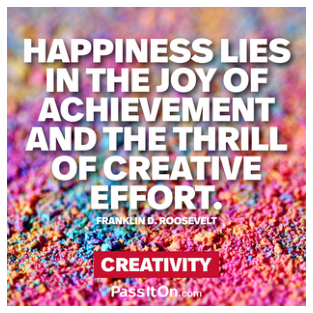

In [92]:
for dta in image:
    show_image(dta)

In [97]:
def show_image_en():
    for i, link in enumerate(image):
        with open('inspiration{}.jpj'.format(i), 'wb') as file:
            url = requests.get(link)
            file.write(url.content)
            img = cv2.imread('/content/inspiration{}.jpj'.format(i))
            rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.style.use('seaborn')
# plt.imshow(img)
            plt.imshow(rgb_image)
            plt.axis("off")
            plt.show()

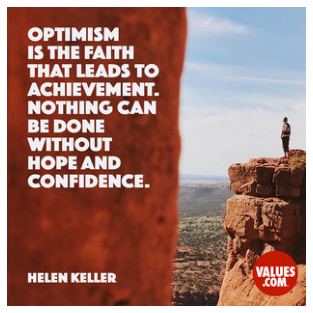

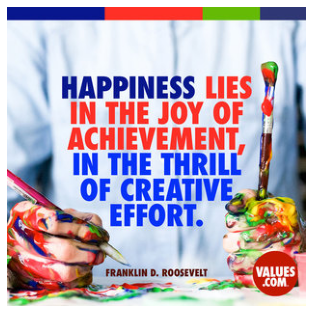

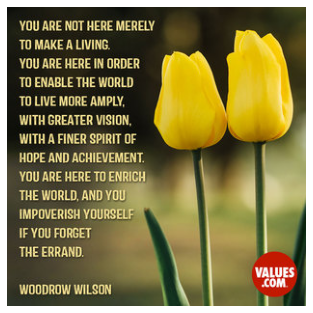

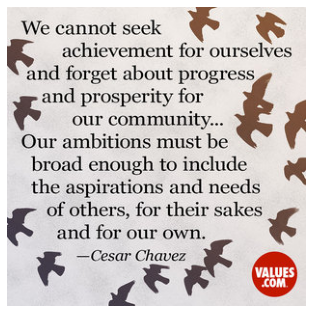

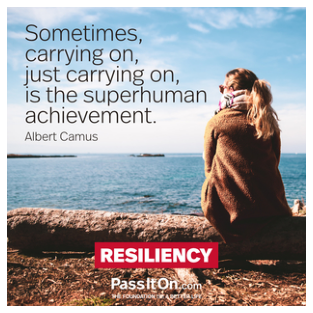

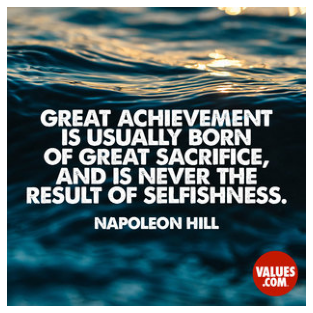

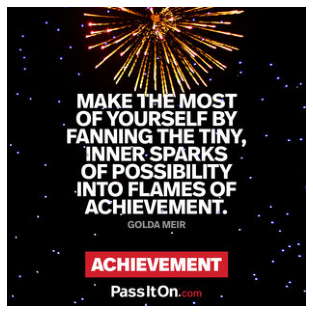

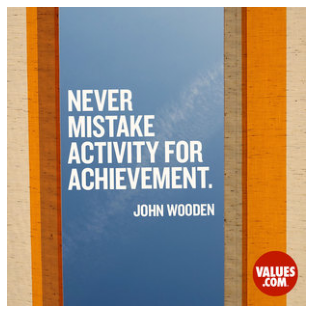

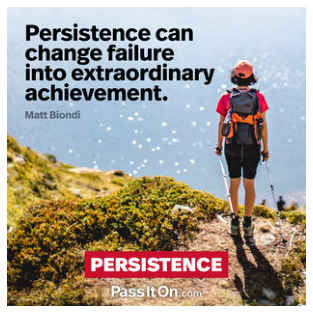

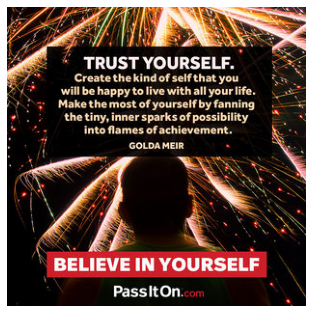

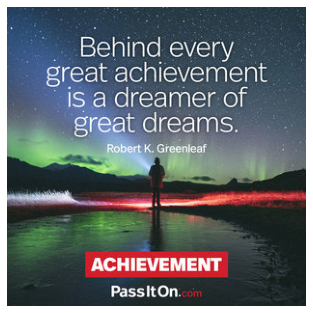

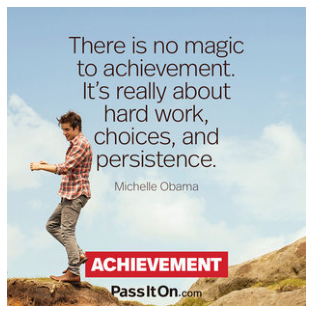

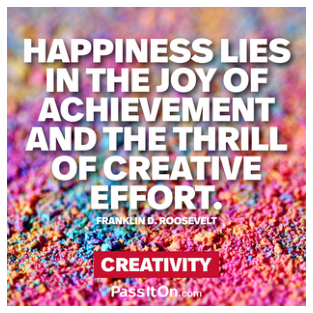

In [98]:
show_image_en()